# **1. Importing Dependancies**

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# **2. Keypoints using MP Holistic** #

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #Color conversion
    image.flags.writeable = False #Image is no longer writeable
    results = model.process(image) #Make prediction
    image.flags.writeable = True #Image is writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)#Color conversion
    return image, results

In [4]:
def draw_landmarks(image,results):
   # mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS) #Draw face connections
    #mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #Draw pose connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #Draw pose connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #Draw left hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read feed
        ret,frame = cap.read()

        #Make detection
        image,results = mediapipe_detection(frame,holistic)
        #draw_landmarks(image,results)
        draw_styled_landmarks(image,results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed',image)
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [14]:
len(results.right_hand_landmarks.landmark)

21

In [15]:
image


array([[[139, 171, 168],
        [135, 167, 164],
        [137, 168, 165],
        ...,
        [208, 190, 164],
        [205, 186, 161],
        [203, 184, 159]],

       [[141, 173, 174],
        [137, 168, 169],
        [137, 167, 167],
        ...,
        [205, 190, 161],
        [207, 189, 158],
        [204, 185, 155]],

       [[152, 173, 171],
        [147, 169, 167],
        [147, 171, 168],
        ...,
        [202, 189, 160],
        [206, 190, 161],
        [204, 187, 159]],

       ...,

       [[ 41,  61,  54],
        [ 43,  62,  53],
        [ 44,  63,  50],
        ...,
        [ 58,  64,  48],
        [ 53,  61,  47],
        [ 53,  61,  47]],

       [[ 39,  59,  61],
        [ 39,  59,  60],
        [ 42,  61,  59],
        ...,
        [ 51,  62,  46],
        [ 50,  60,  48],
        [ 50,  60,  48]],

       [[ 39,  58,  65],
        [ 39,  58,  62],
        [ 42,  61,  59],
        ...,
        [ 47,  61,  47],
        [ 45,  59,  47],
        [ 46,  60,  48]]

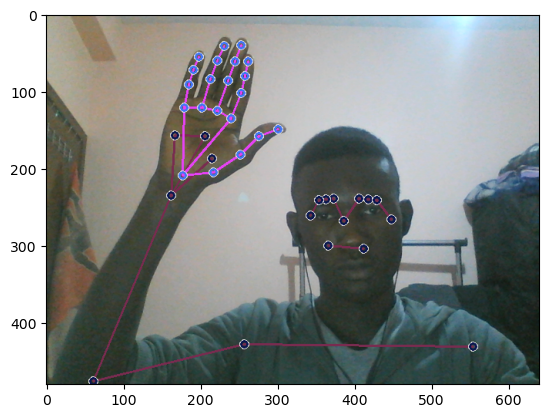

In [16]:
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# **3. Extract keypoint values** #

In [18]:
#results.pose_world_landmarks.landmark[0].visibility
len(results.pose_world_landmarks.landmark)
#len(results.left_hand_landmarks.landmark)

33

In [19]:
pose = []
for res in results.pose_world_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_world_landmarks.landmark ]).flatten() if results.pose_world_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark ]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark ]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #return np.concatenate([pose, face, lh, rh])
    return np.concatenate([pose,lh,rh])

In [23]:
result_test=extract_keypoints(results)

In [24]:
len(result_test)

258

In [26]:
33*4+21*3+21*3

258

In [27]:
np.save('0',result_test)

In [28]:
np.load('0.npy')

array([ 6.03655159e-01,  5.60225904e-01, -8.22424591e-01,  9.99889910e-01,
        6.34684026e-01,  4.98960108e-01, -7.70924628e-01,  9.99785125e-01,
        6.53339803e-01,  5.00261486e-01, -7.70556450e-01,  9.99660730e-01,
        6.70929253e-01,  5.03333211e-01, -7.70796597e-01,  9.99770105e-01,
        5.83407640e-01,  4.99784201e-01, -7.35510528e-01,  9.99773145e-01,
        5.67939758e-01,  5.01115739e-01, -7.34516442e-01,  9.99641359e-01,
        5.53135872e-01,  5.02452612e-01, -7.34578311e-01,  9.99790668e-01,
        7.01219380e-01,  5.54504395e-01, -4.27825034e-01,  9.99663770e-01,
        5.36675513e-01,  5.45080781e-01, -2.34711140e-01,  9.99721825e-01,
        6.44081950e-01,  6.33878529e-01, -7.02689588e-01,  9.99878466e-01,
        5.71941376e-01,  6.26669586e-01, -6.49362445e-01,  9.99887705e-01,
        8.67083728e-01,  8.99009705e-01, -3.31039757e-01,  9.98972058e-01,
        4.02896225e-01,  8.92967403e-01, -1.15822688e-01,  9.99458551e-01,
        1.00218928e+00,  

# **4. Set folder for collection** #

In [6]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
#actions = np.array(['hello', 'thanks', 'iloveyou'])
#actions = np.array(['A','AIN','ANGRYMOJI','B','CH','DAD','F','GH','H','HAPPYMOJI','J','L','M','Q','R','S','SAD','SADMOJI','T','TA','TH','THA','Y'])
#actions = np.array(['A','B','C','D','E','F','G','H','I','J','k','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
actions = np.array(['A','B','C'])

#thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [30]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [32]:
# Making directories for every label dataset
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
print('directories created')

directories created


# **5. Collect keypoint values for training and testing**

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [19]:
cap.release()
cv2.destroyAllWindows()

# **6. Preprocess data and create labels and features** #

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [9]:
label_map

{'A': 0, 'B': 1, 'C': 2}

In [10]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
np.array(sequences).shape

(90, 30, 258)

In [39]:
np.array(labels).shape

(90,)

In [11]:
X = np.array(sequences)

In [53]:
X.shape

(90, 30, 258)

In [12]:
y = to_categorical(labels).astype(int)

In [55]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [57]:
y_test.shape

(5, 3)

# **7. Build and Train LSTM Neural Network**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [76]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [15]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

#to use if possible
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [14]:
res = [.7, 0.2, 0.1]

In [79]:
actions[np.argmax(res)]

'A'

In [80]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 [==============================] - 7s 128ms/step - loss: 1.0894 - categorical_accuracy: 0.3059
Epoch 2/500
3/3 [==============================] - 0s 115ms/step - loss: 1.0301 - categorical_accuracy: 0.3765
Epoch 3/500
3/3 [==============================] - 0s 105ms/step - loss: 1.3084 - categorical_accuracy: 0.5059
Epoch 4/500
3/3 [==============================] - 0s 109ms/step - loss: 1.0766 - categorical_accuracy: 0.3882
Epoch 5/500
3/3 [==============================] - 0s 111ms/step - loss: 0.9763 - categorical_accuracy: 0.4706
Epoch 6/500
3/3 [==============================] - 0s 103ms/step - loss: 0.8982 - categorical_accuracy: 0.6000
Epoch 7/500
3/3 [==============================] - 0s 106ms/step - loss: 0.7579 - categorical_accuracy: 0.6471
Epoch 8/500
3/3 [==============================] - 0s 98ms/step - loss: 0.8140 - categorical_accuracy: 0.6941
Epoch 9/500
3/3 [==============================] - 0s 105ms/step - loss: 0.9605 - categorical_accuracy: 0.5765
Ep

Epoch 147/500
3/3 [==============================] - 0s 122ms/step - loss: 0.0402 - categorical_accuracy: 0.9882
Epoch 148/500
3/3 [==============================] - 0s 117ms/step - loss: 0.0353 - categorical_accuracy: 0.9882
Epoch 149/500
3/3 [==============================] - 0s 117ms/step - loss: 0.0327 - categorical_accuracy: 0.9882
Epoch 150/500
3/3 [==============================] - 0s 112ms/step - loss: 0.0568 - categorical_accuracy: 0.9765
Epoch 151/500
3/3 [==============================] - 0s 113ms/step - loss: 0.0473 - categorical_accuracy: 0.9882
Epoch 152/500
3/3 [==============================] - 0s 104ms/step - loss: 0.0791 - categorical_accuracy: 0.9647
Epoch 153/500
3/3 [==============================] - 0s 107ms/step - loss: 0.0634 - categorical_accuracy: 0.9765
Epoch 154/500
3/3 [==============================] - 0s 100ms/step - loss: 0.0335 - categorical_accuracy: 0.9882
Epoch 155/500
3/3 [==============================] - 0s 103ms/step - loss: 0.0319 - categorical_

3/3 [==============================] - 0s 104ms/step - loss: 7.7559e-05 - categorical_accuracy: 1.0000
Epoch 291/500
3/3 [==============================] - 0s 104ms/step - loss: 7.5353e-05 - categorical_accuracy: 1.0000
Epoch 292/500
3/3 [==============================] - 0s 102ms/step - loss: 7.1673e-05 - categorical_accuracy: 1.0000
Epoch 293/500
3/3 [==============================] - 0s 106ms/step - loss: 6.8920e-05 - categorical_accuracy: 1.0000
Epoch 294/500
3/3 [==============================] - 0s 93ms/step - loss: 6.7364e-05 - categorical_accuracy: 1.0000
Epoch 295/500
3/3 [==============================] - 0s 125ms/step - loss: 6.4109e-05 - categorical_accuracy: 1.0000
Epoch 296/500
3/3 [==============================] - 0s 100ms/step - loss: 6.1864e-05 - categorical_accuracy: 1.0000
Epoch 297/500
3/3 [==============================] - 0s 108ms/step - loss: 5.9992e-05 - categorical_accuracy: 1.0000
Epoch 298/500
3/3 [==============================] - 0s 108ms/step - loss: 5.73

3/3 [==============================] - 0s 103ms/step - loss: 8.3586e-07 - categorical_accuracy: 1.0000
Epoch 431/500
3/3 [==============================] - 0s 111ms/step - loss: 8.2323e-07 - categorical_accuracy: 1.0000
Epoch 432/500
3/3 [==============================] - 0s 103ms/step - loss: 8.0921e-07 - categorical_accuracy: 1.0000
Epoch 433/500
3/3 [==============================] - 0s 100ms/step - loss: 7.9659e-07 - categorical_accuracy: 1.0000
Epoch 434/500
3/3 [==============================] - 0s 115ms/step - loss: 7.8116e-07 - categorical_accuracy: 1.0000
Epoch 435/500
3/3 [==============================] - 0s 96ms/step - loss: 7.7134e-07 - categorical_accuracy: 1.0000
Epoch 436/500
3/3 [==============================] - 0s 105ms/step - loss: 7.6013e-07 - categorical_accuracy: 1.0000
Epoch 437/500
3/3 [==============================] - 0s 110ms/step - loss: 7.5031e-07 - categorical_accuracy: 1.0000
Epoch 438/500
3/3 [==============================] - 0s 103ms/step - loss: 7.43

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            82688     
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-tr

# **8. Make Predictions** #

In [83]:
res = model.predict(X_test)

1/1 [==============================] - 1s 612ms/step


In [99]:
actions[np.argmax(res[3])]

'A'

In [100]:
actions[np.argmax(y_test[3])]

'A'

# **9. Save Weights** #

In [86]:
model.save('Models/action_3.h5')

In [87]:
#del model

In [88]:
model.load_weights('Models/action_3.h5')

# **10. Evaluation using Confusion Matrix and Accuracy** #

In [101]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [102]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [103]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [104]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [105]:
accuracy_score(ytrue, yhat)

1.0

# **11. Test in Real Time** #

In [16]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [21]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        #sequence.insert(0,keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        
        #viz logic
        #if np.unique(predictions[-10:])[0]==np.argmax(res): 
        if res[np.argmax(res)] > threshold:                    
            if len(sentence) > 0: 
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
                sentence = sentence[-5:]
         # Viz probabilities
        image = prob_viz(res, actions, image, colors)
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
B

1/1 [==============================] - 0s 40ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 40ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 48ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
B


In [17]:
#Loading model
from keras.models import load_model

model = load_model('Models/action_3.h5')

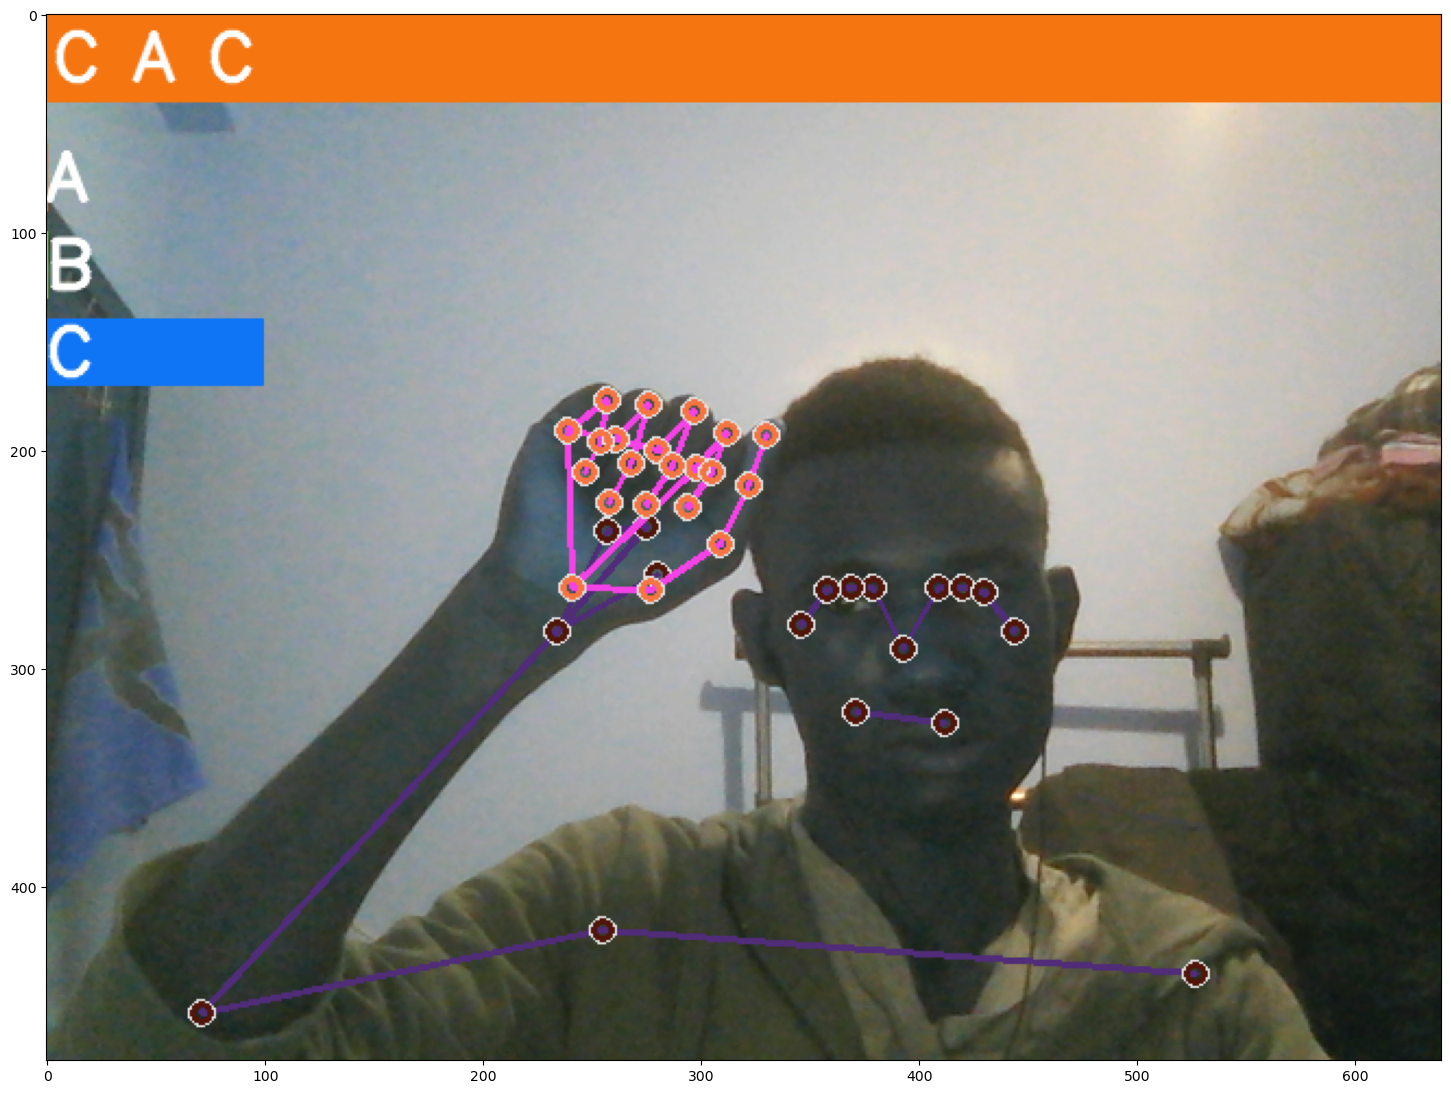

In [128]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [129]:
sequence.reverse()

In [130]:
len(sequence)

30

In [131]:
sequence.append('def')

In [132]:
sequence.reverse()

In [133]:
sequence[-30:]

[array([ 6.10723853e-01,  5.92633486e-01, -6.17207885e-01,  9.99915421e-01,
         6.36072099e-01,  5.34970641e-01, -5.66504180e-01,  9.99800384e-01,
         6.52322650e-01,  5.35902083e-01, -5.66385210e-01,  9.99728799e-01,
         6.68608248e-01,  5.38189650e-01, -5.66626430e-01,  9.99796152e-01,
         5.91162920e-01,  5.33594668e-01, -5.35548210e-01,  9.99810874e-01,
         5.76826870e-01,  5.33725917e-01, -5.34673572e-01,  9.99739647e-01,
         5.62099576e-01,  5.34806788e-01, -5.34985900e-01,  9.99844730e-01,
         6.91731989e-01,  5.78310013e-01, -2.46359631e-01,  9.99711752e-01,
         5.41130126e-01,  5.68575799e-01, -6.22961447e-02,  9.99818146e-01,
         6.38512015e-01,  6.61483228e-01, -5.05288482e-01,  9.99809921e-01,
         5.77046573e-01,  6.50615633e-01, -4.56665367e-01,  9.99861717e-01,
         8.26152921e-01,  9.20570016e-01, -1.59581274e-01,  9.97115970e-01,
         3.89541686e-01,  8.76493812e-01,  3.76919545e-02,  9.99241769e-01,
         9.4

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
       #sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [123]:
cap.release()
cv2.destroyAllWindows()

In [134]:
res[np.argmax(res)] > threshold

True

In [136]:
#(num_sequences,30,1662)
(no_sequences,30,258)

(30, 30, 258)

In [83]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 57ms/step


array([[0.44004565, 0.2084197 , 0.3515347 ]], dtype=float32)

In [137]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 42ms/step


array([[1.4138990e-16, 1.5377898e-25, 1.0000000e+00]], dtype=float32)